# Official Efficiency Plots for 2017 and 2018

Dedicated notebook to produce all efficiency plots (2017 and 2018) to ringer note/paper.

In [7]:
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from EfficiencyTools.analysis.utils import GetHistogramRootPaths, GetHistogramFromMany, GetProfile, PlotProfiles
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle
SetAtlasStyle()
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


Applying ATLAS style settings...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [160]:
def Save(hists, keys, paths, output):
    from Gaugi.storage import StoreGate
    store = StoreGate(output)
    for idx, _path in enumerate(paths):
        key = keys[idx]
        __path = str('/').join(_path.split('/')[0:-1])
        if key in hists.keys():
            store.mkdir(__path)
            store.cd(__path)
            store.addObject(hists[key])
    store.write()
    
def Load(input, keys, paths):
    d = {}
    from Gaugi.storage import StoreGate
    store = StoreGate(input, restoreStoreGate=True)
    dirs = store.getDirs()
    for idx, _path in enumerate(paths):
        key = keys[idx]
        __path = '/' + _path
        if __path in dirs:
            hist = store.histogram(__path)
            d[key] = hist
    return d

## 1) Read all files:

### 1.1) Create keys and paths

In [57]:
triggers = [
            'HLT_e28_lhtight_nod0_ivarloose',
            'HLT_e28_lhtight_nod0_noringer_ivarloose',
            'HLT_e17_lhvloose_nod0_L1EM15VHI',
            'HLT_e26_lhtight_nod0_ivarloose',
            'HLT_e60_lhmedium_nod0'
            ]
paths, keys =  GetHistogramRootPaths( triggers, removeInnefBefore=False, is_emulation=False)

Making paths...|############################################################| 5/5
Making paths...... finished task in 0.019773s.


### 1.2) EGAM1 2017 (before TS1)

In [58]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM1/before_ts1'
h_data17_before_ts1 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 188/188
Loading...... finished task in 15.246761s.


In [165]:
Save(h_data17_before_ts1,  keys, paths, 'hists_data17_EGAM1_before_ts1.root')

**NOTE**: Run this cell to reload the histograms into the memory.

In [ ]:
h_data17_before_ts1 = Load('hists_data17_EGAM1_before_ts1.root', keys, paths)

### 1.3) EGAM1 2017 (after TS1)

In [59]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM1/after_ts1'
h_data17_after_ts1 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 1472/1472
Loading...... finished task in 137.323145s.


In [166]:
Save(h_data17_after_ts1,  keys, paths, 'hists_data17_EGAM1_after_ts1.root')

In [ ]:
h_data17_after_ts1 = Load('hists_data17_EGAM1_after_ts1.root', keys, paths)

### 1.4) EGAM1 2018

**NOTE**: Take about 10 minutes

In [ ]:
path = '/Volumes/castor/cern_data/data18_13TeV/Mon/EGAM1/user.*'
h_data18 = GetHistogramFromMany(path, paths, keys)

### 1.5) EGAM7 2017 (before TS1)

In [169]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM7/before_ts1'
h_data17_before_ts1_egam7 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 172/172
Loading...... finished task in 34.356621s.


In [ ]:
h_data17_before_ts1_egam7

In [167]:
Save(h_data17_before_ts1_egam7,  keys, paths, 'hists_data17_EGAM7_before_ts1.root')

AttributeError: 'CPyCppyy_NoneType' object has no attribute 'GetName'

### 1.6) EGAM7 2017 (after TS1)

In [121]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/EGAM7/after_ts1'
h_data17_after_ts1_egam7 = GetHistogramFromMany(path, paths, keys)

Loading...|############################################################| 1373/1373
Loading...... finished task in 269.873727s.


### 1.7) EGAM7 2018

**NOTE**: Take about 10 minutes

In [ ]:
path = '/Volumes/castor/cern_data/data18_13TeV/Mon/EGAM7/user.*'
h_data18_egam7 = GetHistogramFromMany(path, paths, keys)

## 2) Official plots (ringer vs noringer 2017, after TS1):

Compare ringer and noringer (backup triggers) chains.

In [60]:
these_colors = [kBlack,kBlue-4]
these_markers = [23, 24]

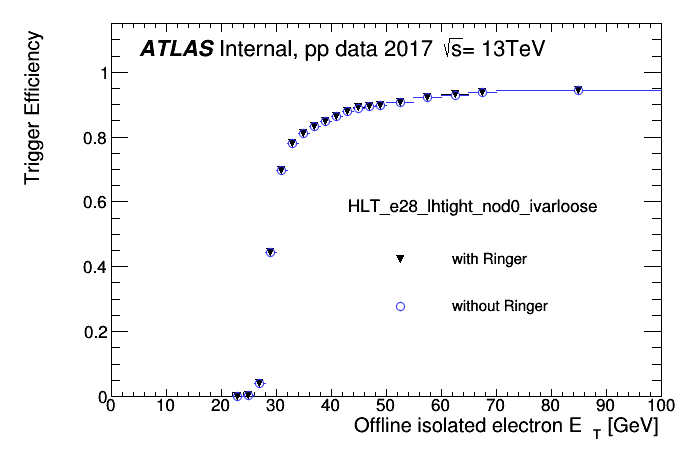

In [56]:
hists_et = [
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_et'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_et']),
]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.0)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.5, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
MakeLegend( canvas,0.5,0.3,.98,0.6,textsize=16, names=['with Ringer', 'without Ringer'], option = 'p' )
canvas.Draw()
canvas.SaveAs('e28_lhtight_nod0_ivarloose_et.pdf')

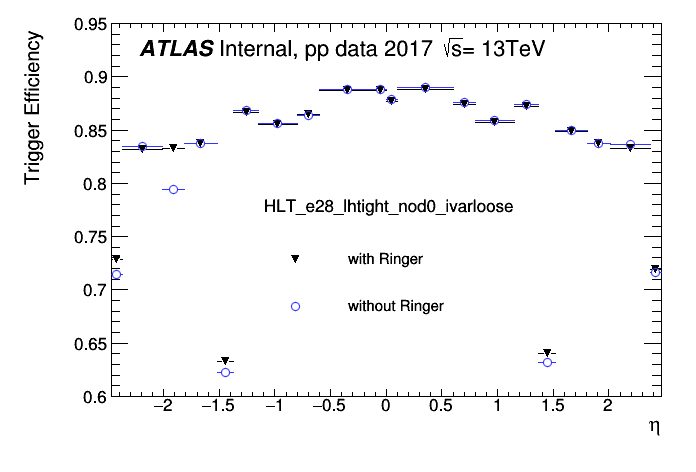

In [55]:
hists_eta = [
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_eta']),
]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.95, y_axes_minimum=0.6)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.38, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
MakeLegend( canvas,0.35,0.3,.98,0.6,textsize=16, names=['with Ringer', 'without Ringer'], option = 'p' )
canvas.Draw()
canvas.SaveAs('e28_lhtight_nod0_ivarloose_eta.pdf')

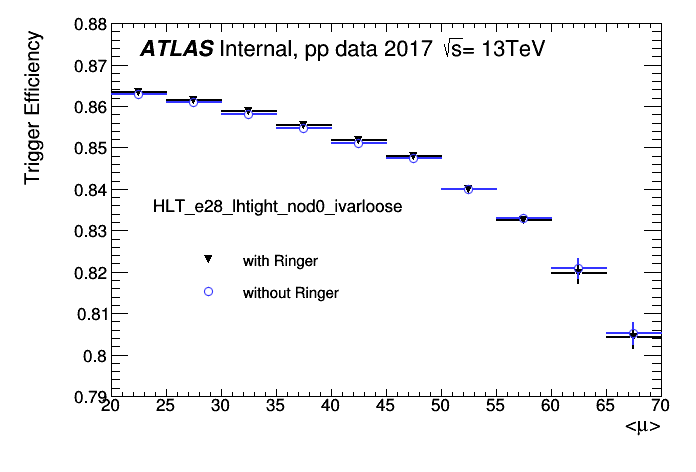

In [54]:
resize =  [10,20,70]
hists_mu = [
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_mu'], resize),
            GetProfile(h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e28_lhtight_nod0_noringer_ivarloose_HLT_mu'],resize),
]
canvas = PlotProfiles( hists_mu, '<#mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=0.88,y_axes_minimum=0.79)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.22, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
MakeLegend( canvas,0.25,0.35,.98,0.55,textsize=16, names=['with Ringer', 'without Ringer'], option = 'p' )
canvas.Draw()
canvas.SaveAs('e28_lhtight_nod0_ivarloose_mu.pdf')

## 3) Official plots (2017 ringer vs noringer before and after TS1)

This section will plot all single triggers before and after ts1.
- oper markers: before TS1 (without ringer);
- close markers: after TS1 (with ringer)

In [61]:
these_colors = [kBlack,kBlue-4,kRed+3, kBlack,kBlue-4,kRed+3]
these_markers = [20,21,22, 24,25,26]

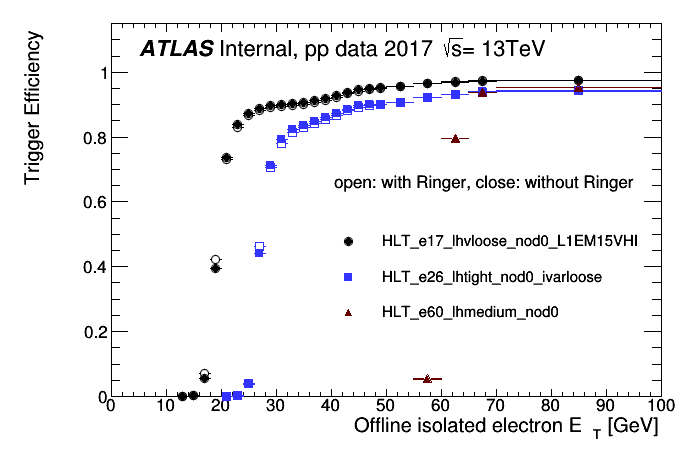

In [80]:
hists_et = [
            GetProfile(h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                       h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
            GetProfile(h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_et'],
                       h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_et']),
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_et'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_et']),
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_et'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_et']),
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_et'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_et']),
]
canvas = PlotProfiles( hists_et, 'Offline isolated electron E_{T} [GeV]', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.0)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.48, 0.6, 'open: with Ringer, close: without Ringer', textsize=0.04)
MakeLegend( canvas,0.45,0.3,.98,0.6,textsize=16, maxlength=50,
            names=['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0'], option = 'p' )
canvas.Draw()
canvas.SaveAs('single_triggers_before_and_after_ts1_et.pdf')

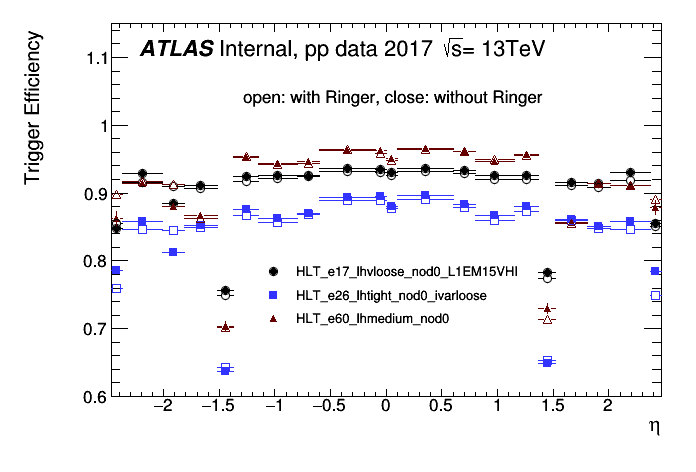

In [101]:
hists_eta = [
            GetProfile(h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                       h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
            GetProfile(h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                       h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_eta']),
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_eta']),
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_eta']),
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_eta'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_eta']),
]
canvas = PlotProfiles( hists_eta, '#eta', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=1.15, y_axes_minimum=0.6)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.35, 0.78, 'open: with Ringer, close: without Ringer', textsize=0.04)
MakeLegend( canvas,0.36,0.3,.98,0.5,textsize=14, maxlength=50,
            names=['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0'], option = 'p' )
canvas.Draw()
canvas.SaveAs('single_triggers_before_and_after_ts1_eta.pdf')

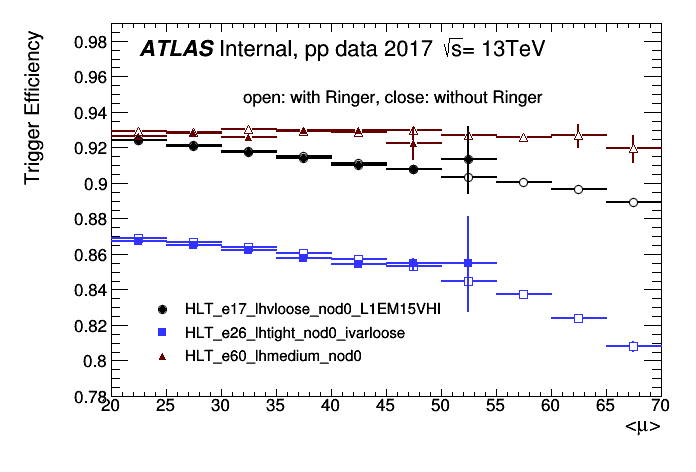

In [114]:
resize =  [10,20,70]
hists_mu = [
            GetProfile(h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
                       h_data17_before_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'],resize),
            GetProfile(h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_before_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_mu'],resize),
            GetProfile(h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_match_mu'],
                       h_data17_before_ts1['HLT_e60_lhmedium_nod0_HLT_mu'],resize),
            GetProfile(h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e17_lhvloose_nod0_L1EM15VHI_HLT_mu'],resize),
            GetProfile(h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e26_lhtight_nod0_ivarloose_HLT_mu'],resize),
            GetProfile(h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_match_mu'],
                       h_data17_after_ts1['HLT_e60_lhmedium_nod0_HLT_mu'],resize),
]
canvas = PlotProfiles( hists_mu, '<#mu>', 
                       these_colors, these_transcolors, these_markers, y_axes_maximum=.99, y_axes_minimum=0.78)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
AddTexLabel(canvas, 0.35, 0.78, 'open: with Ringer, close: without Ringer', textsize=0.04)
MakeLegend( canvas,0.2,0.22,.98,0.42,textsize=16, maxlength=50,
            names=['HLT_e17_lhvloose_nod0_L1EM15VHI','HLT_e26_lhtight_nod0_ivarloose','HLT_e60_lhmedium_nod0'], option = 'p' )
canvas.Draw()
canvas.SaveAs('single_triggers_before_and_after_ts1_mu.pdf')

## 4) Official plots (2017 (after TS1) and 2018 ringer vs noringer)

Here we will plot the comparison between ringer (v6), operating in 2017 after TS1, and ringer v8 (2018 tunings)

- 2017 after TS1: ringer v6 tunings;
- 2018: ringer v8 tunings;